In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('GPU_runtime.csv')


In [5]:
dataset['run_mean']=(dataset['Run1 (ms)'] + dataset['Run2 (ms)'] + dataset['Run3 (ms)'] + dataset['Run4 (ms)'])/4

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
 18  run_mean   241600 non-null  float64
dtypes: float64(5), int64(14

In [7]:
dataset.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MWG       241600 non-null  int64  
 1   NWG       241600 non-null  int64  
 2   KWG       241600 non-null  int64  
 3   MDIMC     241600 non-null  int64  
 4   NDIMC     241600 non-null  int64  
 5   MDIMA     241600 non-null  int64  
 6   NDIMB     241600 non-null  int64  
 7   KWI       241600 non-null  int64  
 8   VWM       241600 non-null  int64  
 9   VWN       241600 non-null  int64  
 10  STRM      241600 non-null  int64  
 11  STRN      241600 non-null  int64  
 12  SA        241600 non-null  int64  
 13  SB        241600 non-null  int64  
 14  run_mean  241600 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.iloc[:,:-1],dataset.iloc[:,[14]],test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

In [11]:
print(x_train.shape)

(193280, 14)


In [12]:
import torch
import torch.nn as nn

In [13]:
#Building the model
model=nn.Sequential(
    nn.Linear(14,392),
    nn.ReLU(),
    nn.Linear(392,196),
    nn.ReLU(),
    nn.Linear(196,1)
)

In [14]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))

In [16]:
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [17]:
# Train the model
n_epochs = 500

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(x_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(x_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 20 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 20/500, Train Loss: 0.4960, Test Loss: 0.4547
Epoch 40/500, Train Loss: 0.1099, Test Loss: 0.1139
Epoch 60/500, Train Loss: 0.0538, Test Loss: 0.0538
Epoch 80/500, Train Loss: 0.0293, Test Loss: 0.0303
Epoch 100/500, Train Loss: 0.0181, Test Loss: 0.0186
Epoch 120/500, Train Loss: 0.0132, Test Loss: 0.0135
Epoch 140/500, Train Loss: 0.0109, Test Loss: 0.0112
Epoch 160/500, Train Loss: 0.0094, Test Loss: 0.0096
Epoch 180/500, Train Loss: 0.0082, Test Loss: 0.0084
Epoch 200/500, Train Loss: 0.0081, Test Loss: 0.0087
Epoch 220/500, Train Loss: 0.0067, Test Loss: 0.0068
Epoch 240/500, Train Loss: 0.0061, Test Loss: 0.0063
Epoch 260/500, Train Loss: 0.0059, Test Loss: 0.0059
Epoch 280/500, Train Loss: 0.0054, Test Loss: 0.0056
Epoch 300/500, Train Loss: 0.0071, Test Loss: 0.0075
Epoch 320/500, Train Loss: 0.0050, Test Loss: 0.0050
Epoch 340/500, Train Loss: 0.0046, Test Loss: 0.0048
Epoch 360/500, Train Loss: 0.0060, Test Loss: 0.0072
Epoch 380/500, Train Loss: 0.0047, Test Loss: 0.00

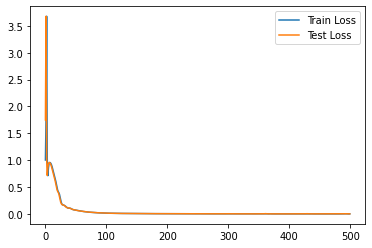

In [18]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [19]:
# Another way
with torch.no_grad():
  out_test = model(x_test).numpy()
  out_train = model(x_train).numpy()

In [20]:
from sklearn.metrics import r2_score
y_test=y_test.numpy()
y_train=y_train.numpy()
print("Train Set Accuracy : ",r2_score(y_train,out_train)*100)
print("Test Set ACcuracy : ",r2_score(y_test,out_test)*100)

Train Set Accuracy :  99.534575934611
Test Set ACcuracy :  99.5185531324467
